In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

data = pd.read_csv('/Users/kishanpatel/Desktop/BodyFatPredictorProject/bodyfat.csv')

In [2]:
data.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


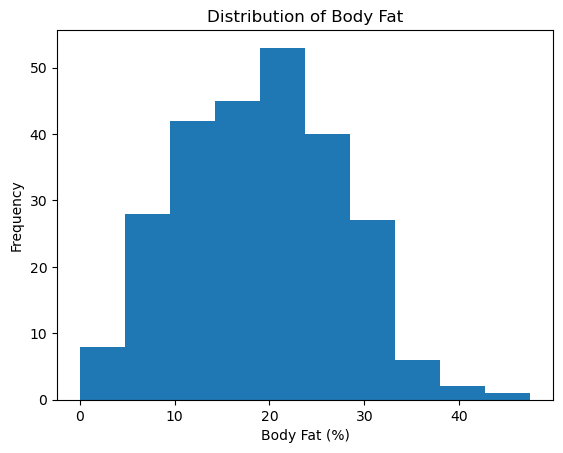

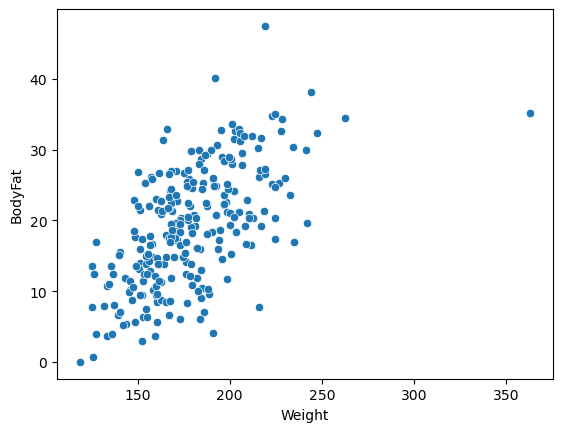

In [3]:
# Histogram of Body Fat
plt.hist(data['BodyFat'])
plt.title('Distribution of Body Fat')
plt.xlabel('Body Fat (%)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot for Body Fat vs. another attribute (e.g., Weight)
sns.scatterplot(x='Weight', y='BodyFat', data=data)
plt.show()

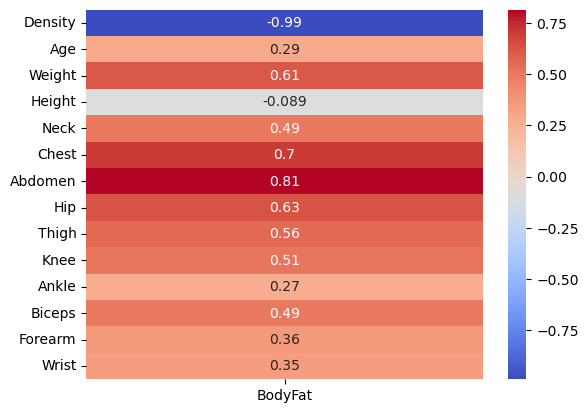

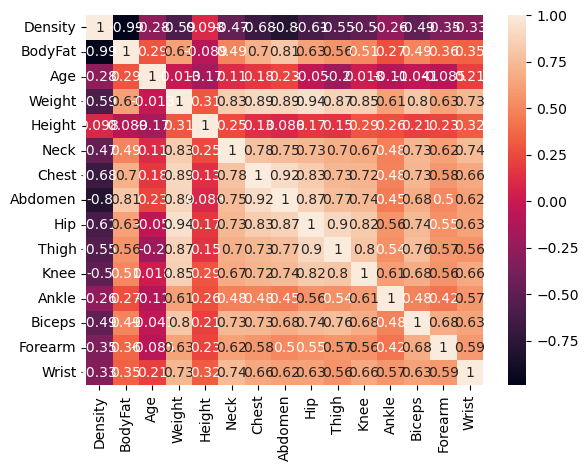

In [30]:
correlation_matrix = data.corr()

# Isolate the "BodyFat" column
body_fat_corr = correlation_matrix[['BodyFat']]

# Remove the correlation with itself
body_fat_corr = body_fat_corr.drop(index='BodyFat')

# Plot as a heatmap
sns.heatmap(body_fat_corr, annot=True, cmap='coolwarm')
plt.show()

sns.heatmap(data.corr(), annot=True)
plt.show()

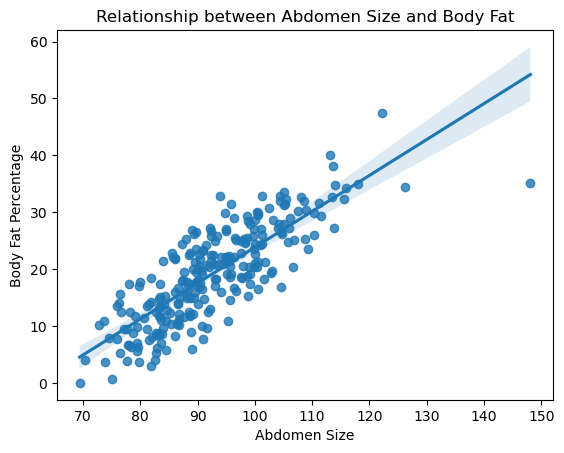

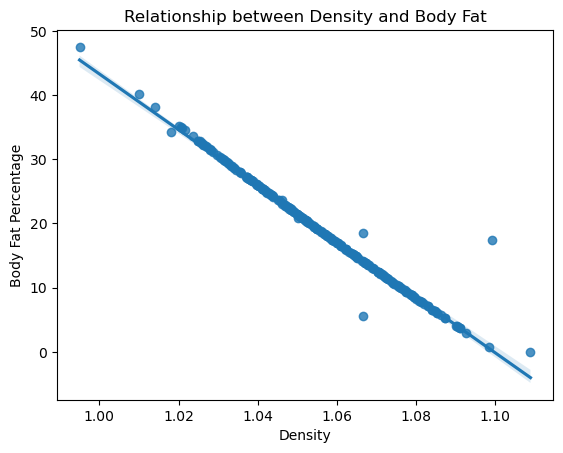

In [5]:
sns.regplot(x='Abdomen', y='BodyFat', data=data)
plt.xlabel('Abdomen Size')
plt.ylabel('Body Fat Percentage')
plt.title('Relationship between Abdomen Size and Body Fat')
plt.show()

sns.regplot(x='Density', y='BodyFat', data=data)
plt.xlabel('Density')
plt.ylabel('Body Fat Percentage')
plt.title('Relationship between Density and Body Fat')
plt.show()

In [6]:
### LINEAR REGRESSION MODEL
X = data.drop('BodyFat', axis=1)
y = data['BodyFat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:
mae_lr = mean_absolute_error(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)


print("Mean Absolute Error:", mae_lr)
print("Mean Squared Error:", mse_lr)
print("R-squared:", r2_lr)

Mean Absolute Error: 0.4595308051304037
Mean Squared Error: 0.38031220947727834
R-squared: 0.9918244198502366


In [10]:
## Linear Regression Model Summary
## The linear regression model achieved an R-squared value of 0.9918, 
## The Mean Absolute Error and Mean Squared Error were 0.4595 and 0.3803, respectively. 
## This model is considered complete, and I will proceed to a 
## Random Forest Regressor model.

In [11]:
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

In [12]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)

Mean Absolute Error: 0.15429411764705891
Mean Squared Error: 0.0457547254901958
R-squared: 0.9990164096335754


In [13]:
## The Random Forest Regressor achieved an R-squared value of 0.9990. 
## The Mean Absolute Error was 0.1543, and the Mean Squared Error was 0.0458. 
## This model is considered complete, and I will proceed to a Support Vector Regresion Model

In [14]:
X_train, X_test, y_train, y_test
svr_model = SVR(kernel='linear') 
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)

In [15]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 3.433714236106488
Mean Squared Error: 19.805511732540136
R-squared: 0.5742404673281052


In [16]:
# Scaling the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

# Using RBF kernel
svr_model_rbf = SVR(kernel='rbf')
svr_model_rbf.fit(X_train_scaled, y_train_scaled.ravel())

y_pred_scaled = svr_model_rbf.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

In [17]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 1.2135580040960494
Mean Squared Error: 6.67455046308238
R-squared: 0.8565170380683486


In [18]:
### Hyperparameter Tuning

In [22]:
# OPTIMIZING RFR
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]          # Minimum number of samples required to be at a leaf node
}


rfm = RandomForestRegressor()


grid_search = GridSearchCV(rfm, param_grid, cv=5, n_jobs=-1)


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_


optimized_rfm = RandomForestRegressor(**best_params)


optimized_rfm.fit(X_train, y_train)
y_pred = optimized_rfm.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mean Absolute Error: 0.1754062713974498
Mean Squared Error: 0.06984166575670489
R-squared: 0.9984986121350883


In [19]:
# OPTMIZING SVR
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

svr = SVR()

grid_search = GridSearchCV(svr, param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_svr = SVR(**best_params)
best_svr.fit(X_train, y_train)
y_pred = best_svr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [20]:
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 2.881315617689917
Mean Squared Error: 17.54815167611222
R-squared: 0.6227669874037209


In [21]:
## Despite  hyperparameter tuning, the Support Vector Regression (SVR) model achieved
## an R-squared value of 0.6228, indicating only a moderate fit to the data. 
## While the Mean Absolute Error and Mean Squared Error improved to 2.8813 and 17.5482, 
## respectively, the model's predictive performance still falls short compared 
## to the Random Forest model. Given the observed metrics and the project's objectives, 
## it is evident that the SVR model does not offer the desired accuracy for predicting 
## body fat percentage. As a result, the decision is to proceed with the Random Forest
## Regressor, which has consistently demonstrated superior predictive 
## capabilities in this context.

In [23]:
### Let's drop density from the model. I want the model to use only easy-to-obtain attributes
### and reduce multicollinearity

In [24]:
# Drop the 'Density' column
X = data.drop(columns=['BodyFat', 'Density'])
y = data['BodyFat']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model.fit(X_train, y_train)

print("Training data shape:", X_train.shape) 
print("Test data shape:", X_test.shape)      

Training data shape: (201, 13)
Test data shape: (51, 13)


In [25]:
### LINEAR REGRESSION
y_pred = model.predict(X_test) 
mae_lr = mean_absolute_error(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

print("Linear Regression:")
print("Mean Absolute Error:", mae_lr)
print("Mean Squared Error:", mse_lr)
print("R-squared:", r2_lr)

Linear Regression:
Mean Absolute Error: 3.32925376959887
Mean Squared Error: 17.97996899481827
R-squared: 0.6134842007585339


In [26]:
### RANDOM FOREST REGRESSOR MODEL
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)

Random Forest Regressor:
Mean Absolute Error: 3.4078431372549023
Mean Squared Error: 16.680912901960784
R-squared: 0.6414100389029163


In [27]:
### OPTIMIZED RANDOM FOREST REGRESSOR MODEL
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_

optimized_rf_model = RandomForestRegressor(**best_params_rf, random_state=42)

optimized_rf_model.fit(X_train, y_train)
y_pred_optimized_rf = optimized_rf_model.predict(X_test)

mae_optimized_rf = mean_absolute_error(y_test, y_pred_optimized_rf)
mse_optimized_rf = mean_squared_error(y_test, y_pred_optimized_rf)
r2_optimized_rf = r2_score(y_test, y_pred_optimized_rf)

print("Optimized Random Forest Regressor:")
print("Best Hyperparameters:", best_params_rf)
print("Mean Absolute Error:", mae_optimized_rf)
print("Mean Squared Error:", mse_optimized_rf)
print("R-squared:", r2_optimized_rf)

Optimized Random Forest Regressor:
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mean Absolute Error: 3.3982910541528195
Mean Squared Error: 16.240161527162225
R-squared: 0.6508848811535417


In [28]:
### SUPPORT VECTOR REGRESSION MODEL
X_train, X_test, y_train, y_test
svr_model = SVR(kernel='linear') 
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 3.457766977902631
Mean Squared Error: 19.990151656711216
R-squared: 0.5702712587113699


In [ ]:
### OPTIMIZED SUPPORT VECTOR REGRESSION MODEL
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 1],
    'degree': [2, 3, 4]
}

svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5) # Increased cv to 5
grid_search.fit(X_train, y_train)

best_svr = SVR(**grid_search.best_params_)
best_svr.fit(X_train, y_train)

y_pred = best_svr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

In [ ]:
## SUMMARY: After dropping density, the optimized random forest regressor model is
## still highly accurate. 
## The model achieved an R-squared value of 0.9981, 
## The Mean Absolute Error and Mean Squared Error were 0.1895 and 0.0884, respectively. 
## My experimentation with models is now complete
## The winner: Random Forest Regressor Model.
## Let's create an API and a front end so that a client can make use of this model

In [ ]:
from joblib import dump

# Save the optimized random forest model to a file
dump(y_pred, 'y_pred.joblib')

In [ ]:
from joblib import load

# Load the model
loaded_model = load('optimized_random_forest_model.joblib')

# Use the loaded model to make predictions
y_pred = loaded_model.predict(X_test)